<a href="https://colab.research.google.com/github/carlosemiliorabazo/deepLearning/blob/master/2_1_Un_primer_vistazo_a_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Un primer vistazo a una Red Neuronal

Utilizaremos la **biblioteca Python Keras** para aprender a **clasificar** dígitos manuscritos. Paciencia, hay cosas que no se entenderán hasta el siguiente tema.

**PROBLEMA:**
- Clasificación de imágenes en escala de grises de números escritos a mano (28 x 28 píxeles) en sus 10 categorías (de 0 a 9)
- Usaremos 60K imágenes de entrenamiento, más de 10K imágenes de prueba todas ellas recopiladas por el National Institute of Standards an Technology (NIST de MNIST) en los años ochenta.
- Este es el "Hola Mundo" del Deep Learning
- El conjunto de datos MNIST está precargado en Keras en la forma de un conjunto de cuatro matrices Numpy
- Algunas muestras

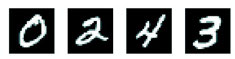

- Una "categoría" de un problema de clasificación, se denomina **clase**
- Los "puntos de datos" son **muestras**
- La clase asociado a una muestra específica se llama **etiqueta**
- Por ahora no vamos a ejecutarlo, vamos a intentar entenderlo

In [1]:
# Importamos Keras
import keras
keras.__version__

'2.6.0'

Cargamos el conjunto de datos  MNIST en Keras

In [12]:
# 1 CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son una matriz de números que van del 0 al 9 (imágenes y etiquetas tienen una correspondencia 1 a 1)

Echamos un vistazo a los **datos de entrenamiento**:

In [ ]:
train_images.shape

(60000, 28, 28)

In [4]:
# Vemos la matriz de la imagen número 30.000 (28x28)
train_images[30000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 156, 205,
        254, 255, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

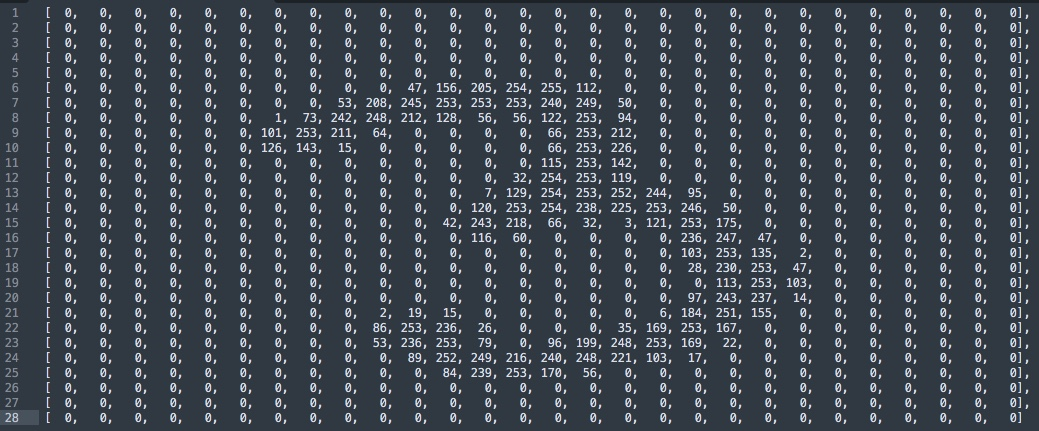

In [5]:
# La imagen anterior corresponde con el número 3. Hasta se puede intuir.... 
train_labels[30000]

3

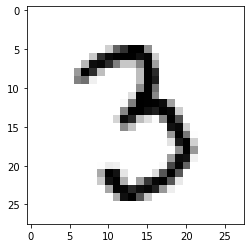

In [7]:
# Veamos el elemento 30000 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Los **datos de prueba**:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [9]:
test_labels.shape, test_labels

((10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### Fujo de trabajo
1. Damos a la RNA los datos de entrenamiento `train_images` y `train_labels`
2. La red aprenderá a asociar imágenes y etiquetas
3. Pediremos a la RNA que haga predicciones para `test_images` y comprobaremos si estas predicciones coinciden con las etiquetas de `test_labels`

**CONSTRUIMOS LA RNA**

- **Capa** (**layers**) es el **componente básico de las redes neuronales**. => Es un **filtro** de datos (módulo de procesamiento de datos).Entran datos y salen con una forma más útil para el objetivo del problema a resolver. => **Destilación de datos**
    - Las capas extraen **representaciones**  de los datos introducidos en ellas, que deberían ser más significativas para el problema en cuestión.

In [13]:
# 2 ARQUITECTURA DE LA RED
from keras import models
from keras import layers

network = models.Sequential()
# Creamos dos capas "Dense", que son capas neuronales densamente conectadas 
# (también llamadas "completamente conectadas")
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que devolverá 
# una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual 
# pertenezca a una de nuestras clases de 10 dígitos.
network.add(layers.Dense(10, activation='softmax'))

Para que nuestra red esté lista para la capacitación, debemos elegir tres cosas más, como parte del paso de "compilación":
- Una **función de pérdida**: es cómo la red podrá medir qué tan bien está haciendo el trabajo con los datos de entrenamiento y, por lo tanto, cómo será capaz de dirigirse en la dirección correcta. (Lo veremos en detalle más adelante)
- Un **optimizador**: este es el mecanismo a través del cual la red se actualizará en función de los datos que ve y su función de pérdida. (Lo veremos en detalle más adelante)
- **Métricas** para monitorizar durante el entrenamiento y las pruebas. Solo nos preocuparemos por la **precisión** `accuracy` (la fracción de las imágenes que fueron clasificado).

In [14]:
# 3 EL PASO DE COMPILACIÓN
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Antes del entrenamiento, **preprocesaremos nuestros datos** dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo `[0, 1]`. Antes, nuestras imágenes de entrenamiento, por ejemplo, se almacenaban en una matriz de forma `(60000, 28, 28)` de tipo `uint8` con valores en el intervalo `[0, 255]`. Lo transformamos en una matriz de forma `float32` con forma `(60000, 28 * 28)` con valores entre 0 y 1.

In [18]:
# 4 PREPARACIÓN DE LOS DATOS DE IMAGEN
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
#train_images, len(train_images), train_images.shape, train_images[300]

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

También tenemos que **codificar categoricamente las etiquetas**, un paso que se explicará más adelante:

In [20]:
# 5 PREPARACIÓN DE LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# de ser 3 y 0. de no ser. El resto, al revés

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ya estamos listos para **entrenar a la red**, lo cual se hace en Keras a través de una llamada al métido `fit` de la red, que **ajusta el modelo a sus datos de entrenamiento**:

In [ ]:
# 6 ENTRENAMIENTO DE LA RED
network.fit(train_images, train_labels, epochs=5, batch_size=128)
# Epoch 1/5
# 60000/60000 [==============================] - 2s - loss: 0.2577 - acc: 0.9245     
# Epoch 2/5
# 60000/60000 [==============================] - 1s - loss: 0.1042 - acc: 0.9690     
# Epoch 3/5
# 60000/60000 [==============================] - 1s - loss: 0.0687 - acc: 0.9793     
# Epoch 4/5
# 60000/60000 [==============================] - 1s - loss: 0.0508 - acc: 0.9848     
# Epoch 5/5
# 60000/60000 [==============================] - 1s - loss: 0.0382 - acc: 0.9890     
# <keras.callbacks.History at 0x7fce5fed5fd0>

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2542 - accuracy: 0.9272
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1025 - accuracy: 0.9702
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0675 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0502 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0375 - accuracy: 0.9894


Se muestran dos cantidades durante el entrenamiento: la **pérdida** (`loss`) de la red sobre los datos de entrenamiento y la **precisión** o exactitud (`acc`) de la red sobre los datos de entrenamiento.

Alcanzamos rápidamente una precisión de 0,989 (es decir, 98,9%) en los datos de entrenamiento. Ahora verificamos que nuestro modelo también funcione bien en el conjunto de prueba:

In [ ]:
# 6 VERIFICACIÓN DE NUESTRO MODELO CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)
# 9536/10000 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9786


In [ ]:
print('test_acc:', test_acc)
# test_acc: 0.9777

test_acc: 0.978600025177002


La precisión de nuestro conjunto de prueba resulta ser del 97,8%, lo que es un poco más baja que la precisión del conjunto de entrenamiento. Esta diferencia es un ejemplo de **sobreajuste**, el hecho de que **los modelos de aprendizaje automático tienden a funcionar peor con datos nuevos que con sus datos de entrenamiento**. El sobreajuste será algo que veamos en detalle más adelante

Acabais de ver cómo podemos construir y entrenar una red neuronal para clasificar dígitos escritos a mano, en menos de 20 líneas de código Python. A partir de ahora, repasaremos en detalle cada pieza que acabamos de ver y aclararemos lo que realmente está sucediendo por dentro.

---